# House Prices Prediction Using Scikit Learn
This is a simple project to learn the basics of supervised machine learning. It helps to predict the price of houses given some certain features.
This is my solution to this [Kaggle competition](https://www.kaggle.com/code/alexisbcook/machine-learning-competitions)

## import the necessary library

In [50]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import    RandomForestRegressor, BaggingRegressor, HistGradientBoostingRegressor, StackingRegressor, VotingRegressor
from sklearn.model_selection import train_test_split    
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare and preprocess the data

In [44]:
# import the training data
data = pd.read_csv('train.csv')
data.describe()


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [45]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
# From above, it can be seen that there are some NaN values and this would not be needed by the model. 
# We could actually generate random values but I'm not conisdering this option at the moment.

# remove columns with NAN value
X = data[data.describe().columns[1:-1]]
y = data.SalePrice
# show the columns
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

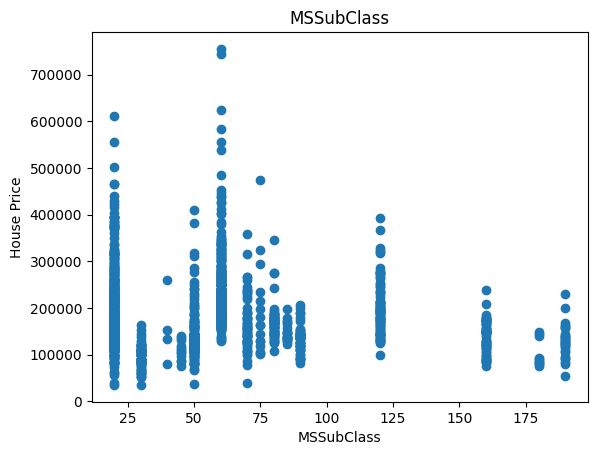

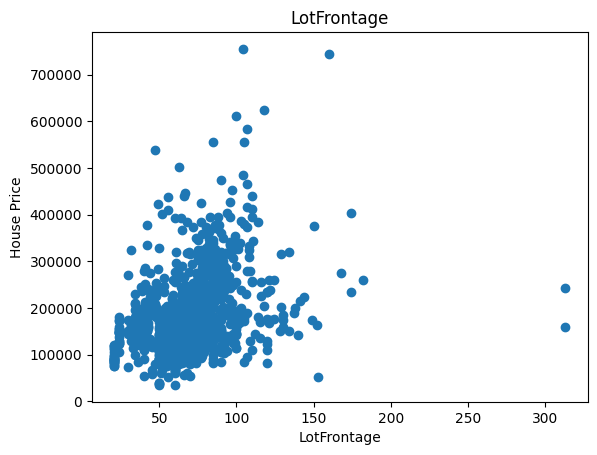

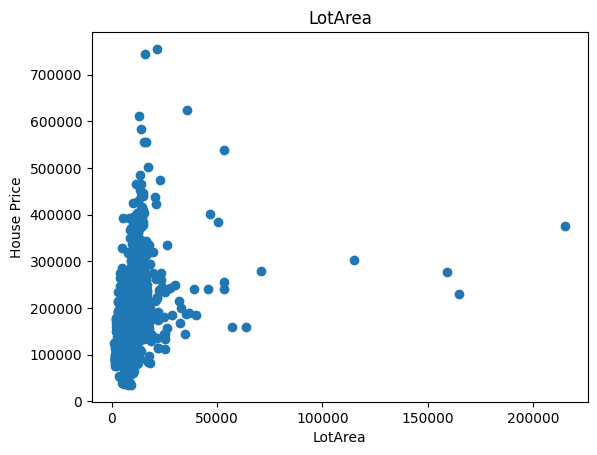

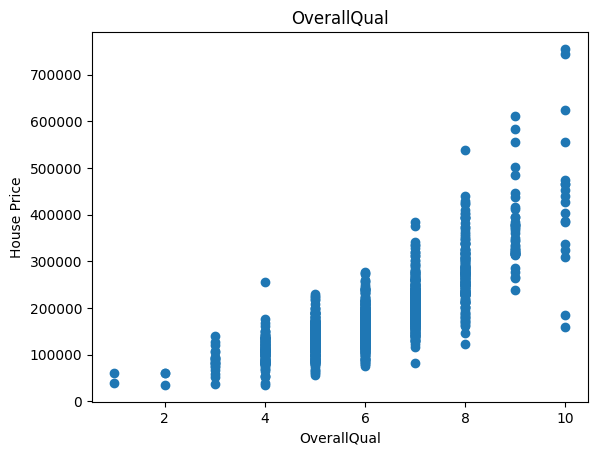

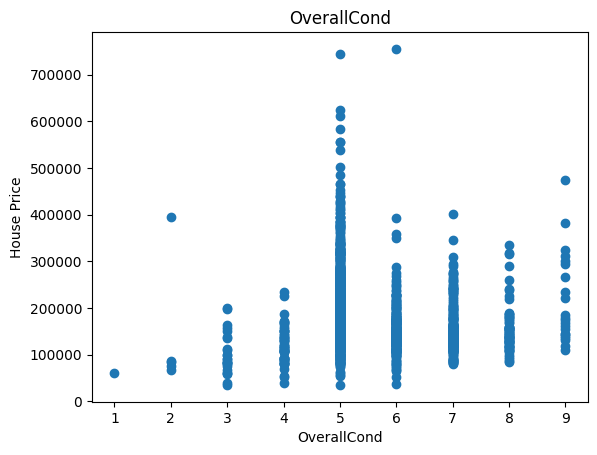

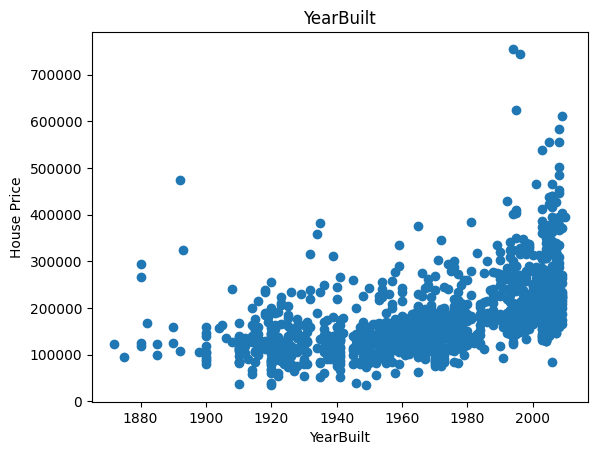

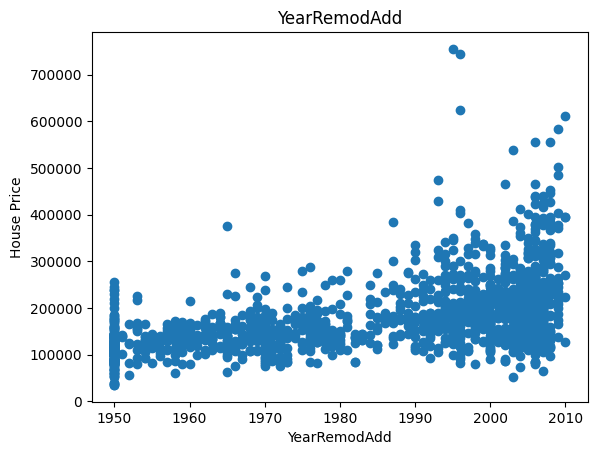

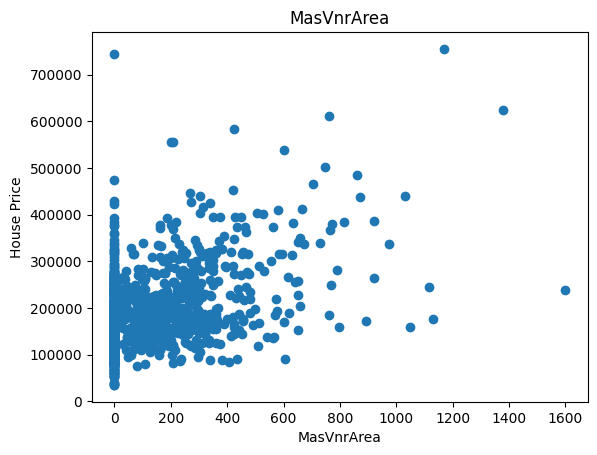

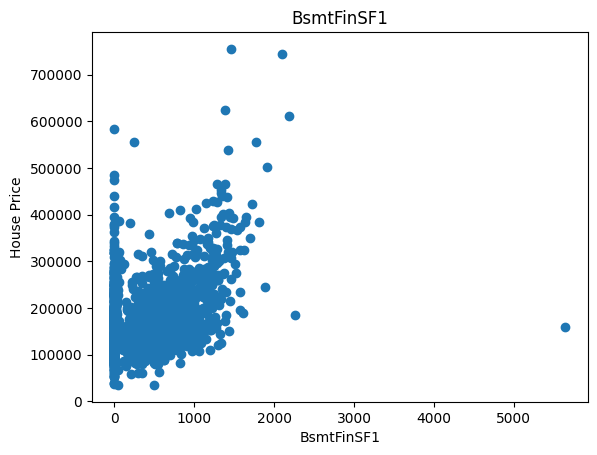

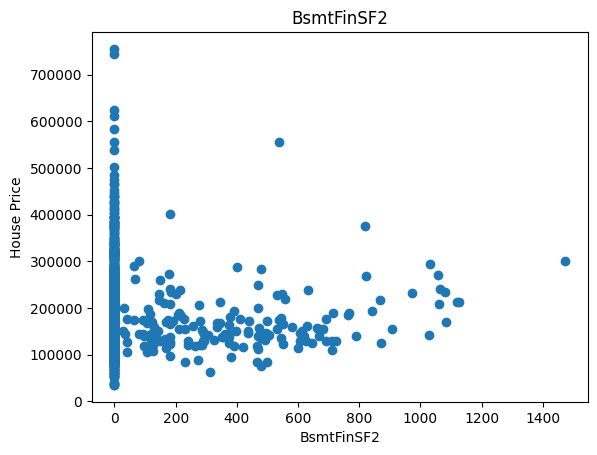

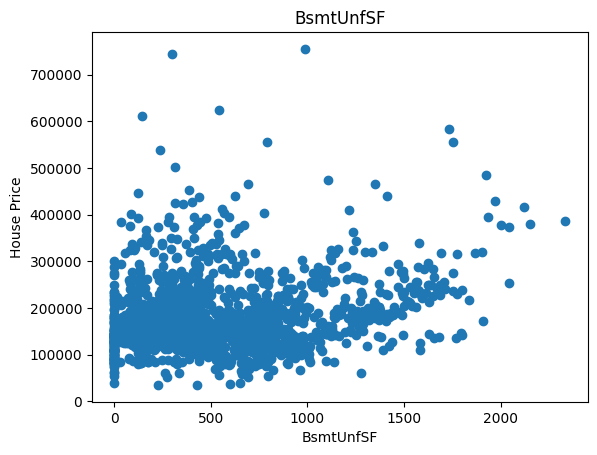

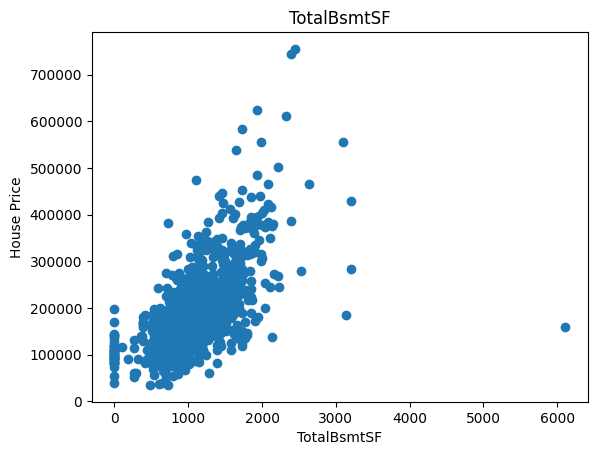

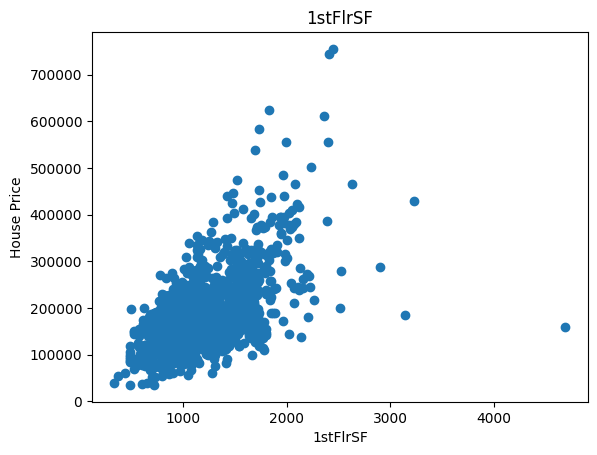

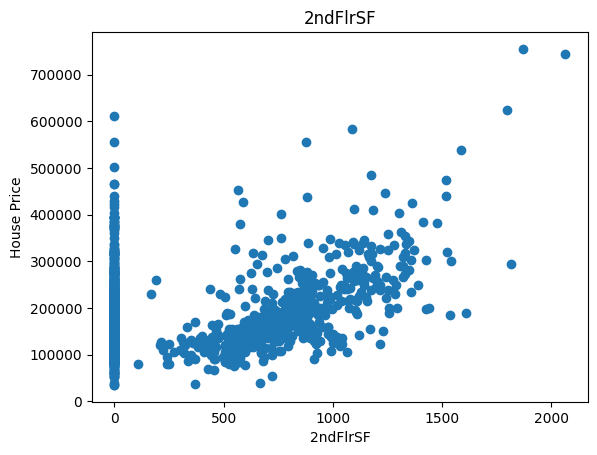

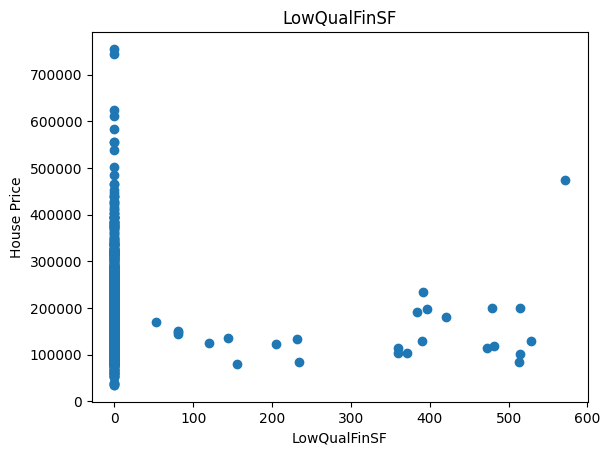

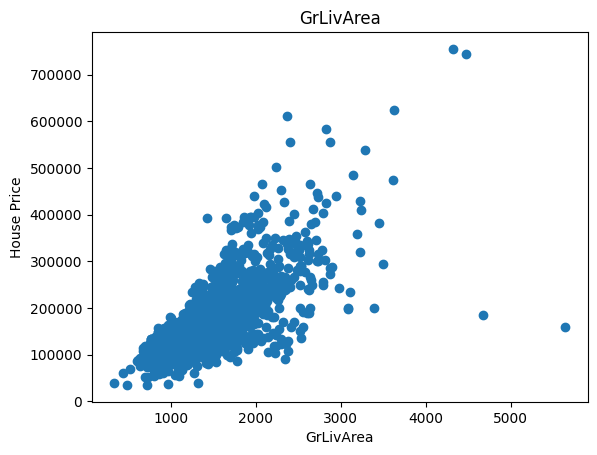

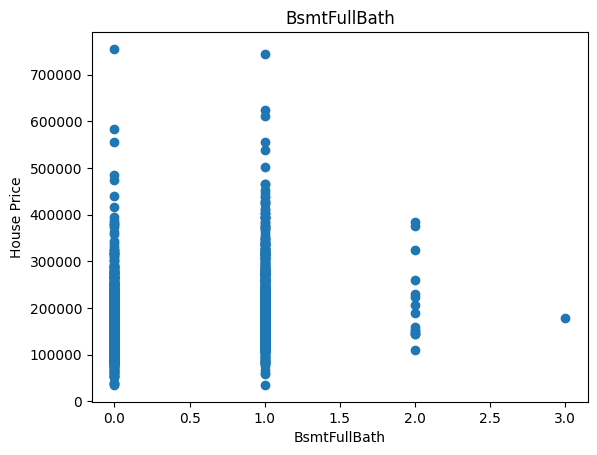

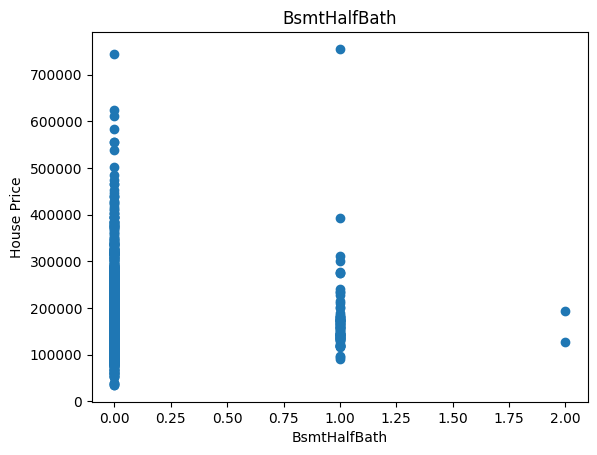

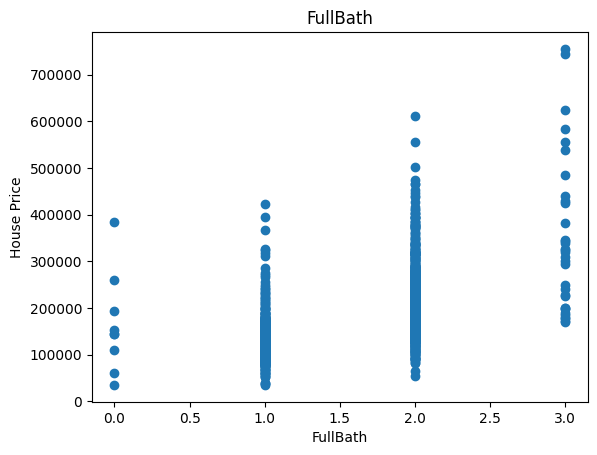

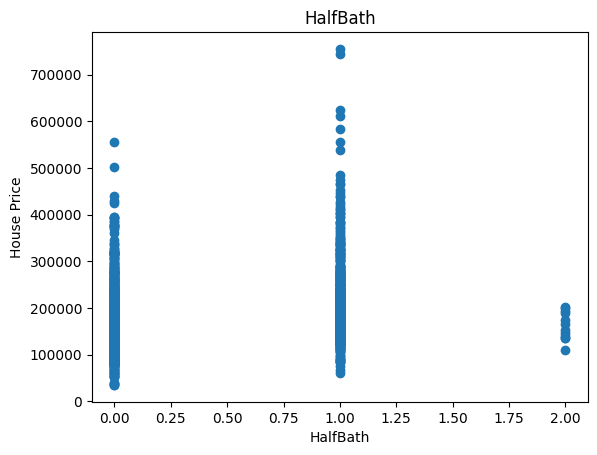

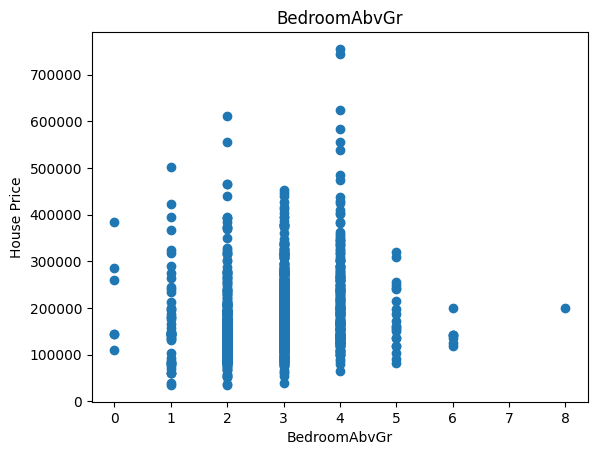

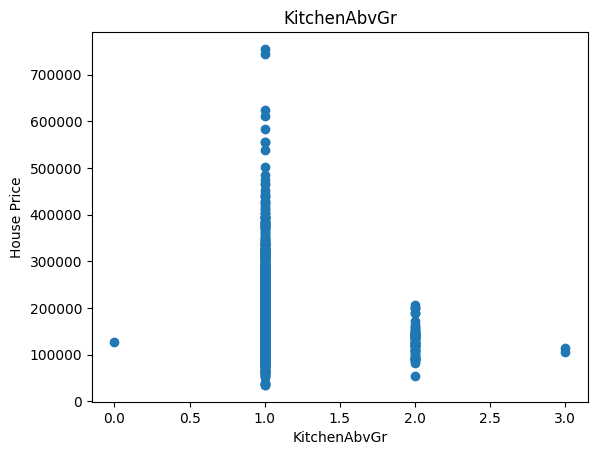

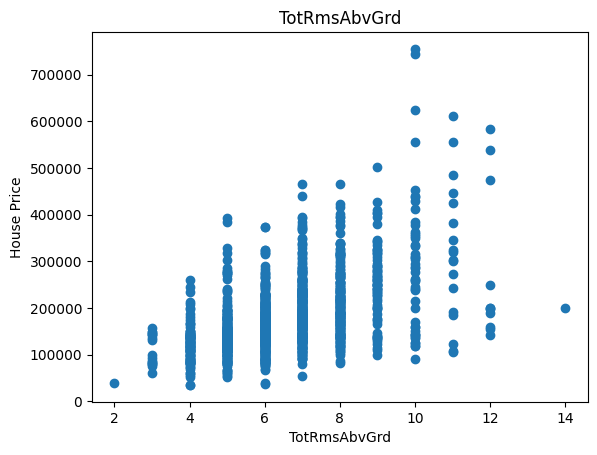

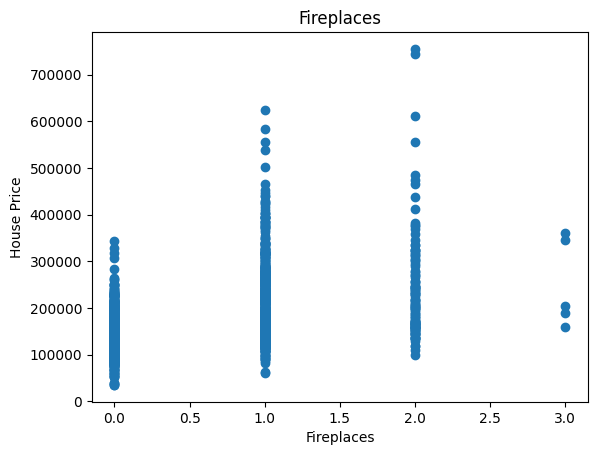

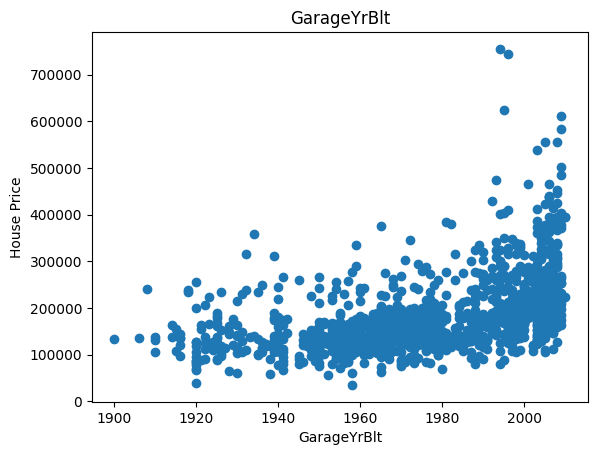

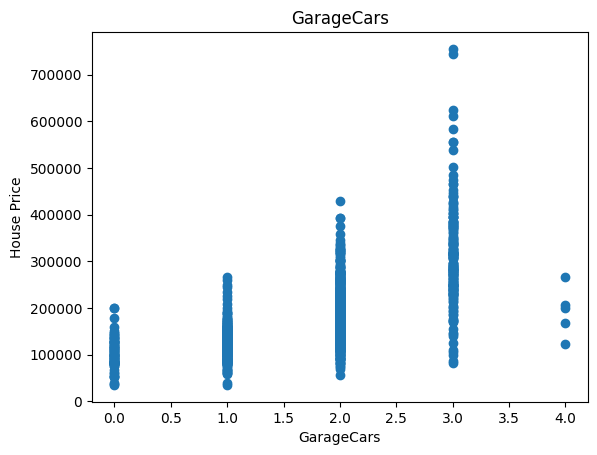

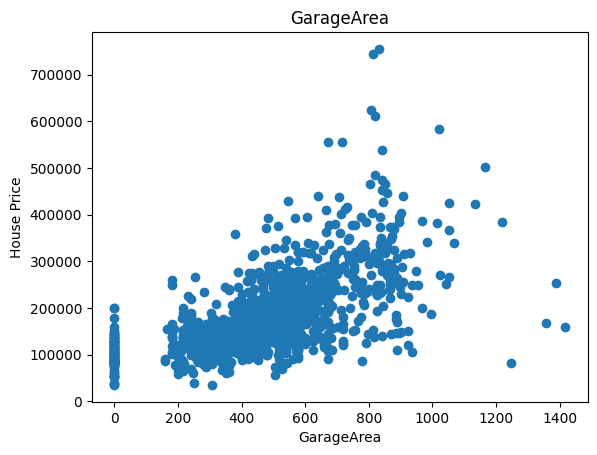

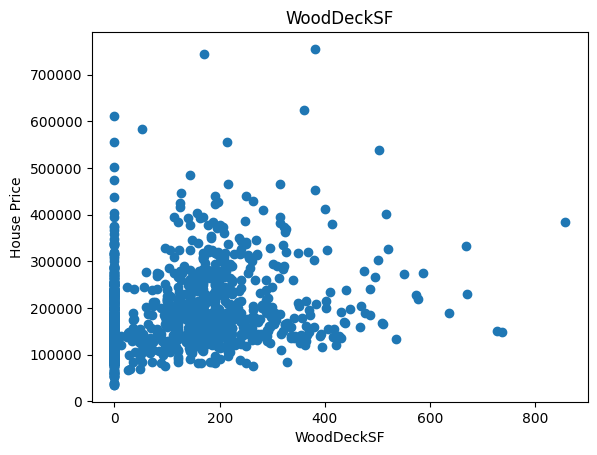

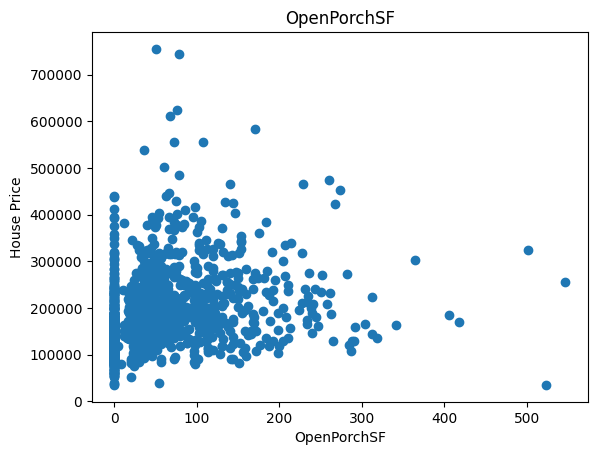

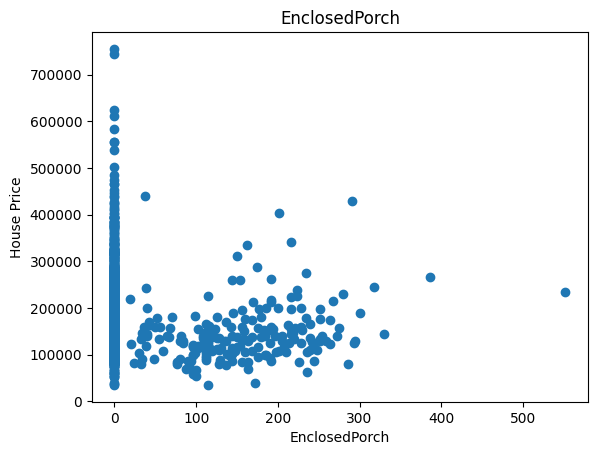

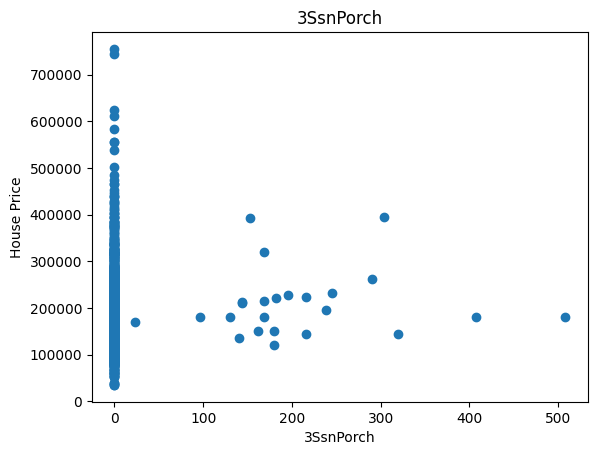

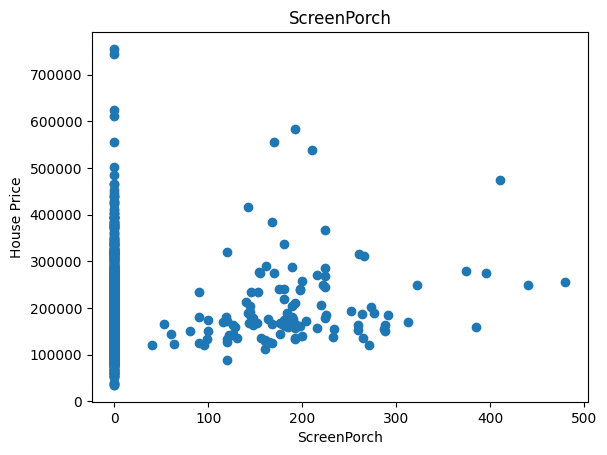

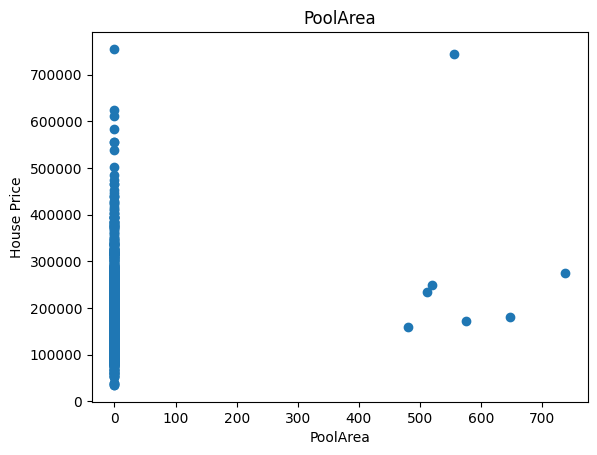

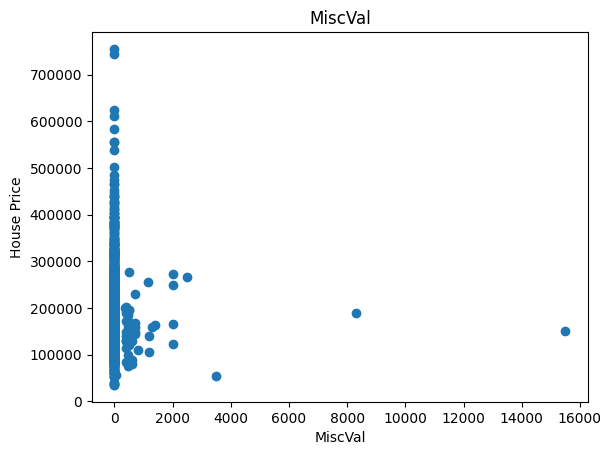

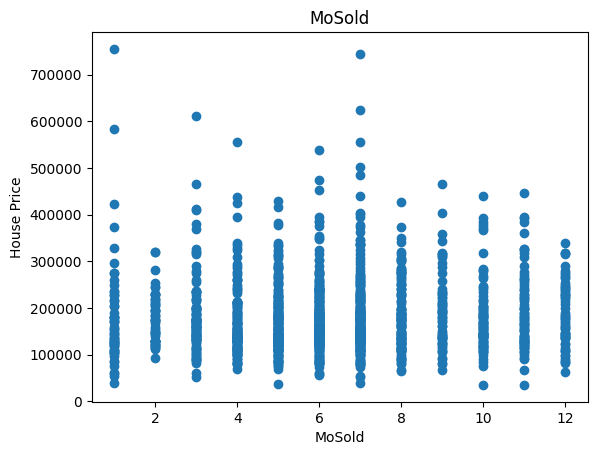

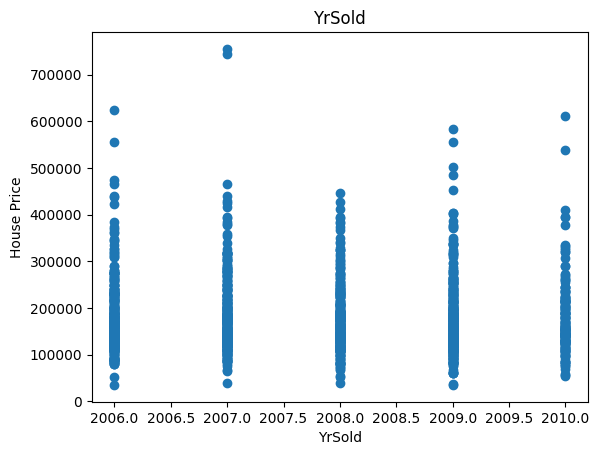

In [48]:
# Analyse the relationship between each feacture and target data, y
for label in X.columns:
    plt.scatter(X[label], y)
    plt.title(label)
    plt.ylabel('House Price')
    plt.xlabel(label)
    plt.show()

In [49]:
# From the above, it can be seen that there is no corellation between some features and the target data y.
# thus, I am going to select the features that have high corellatiion with target output, y.

# note: Input X contains NaN. At another time, I would fix this and check if perfomance if improved

# select the features
features = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       '3SsnPorch', 'ScreenPorch', 'PoolArea']


# get the actual training data
X = X[features]

# drop a row to match the size of the test data
X.drop(X.tail(1).index, inplace=True)

X.describe()

# drop a row to match the size of the test data
y.drop(y.tail(1).index, inplace=True)

# split the training data into training and validation data
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

## Create model

In [51]:
random_forest_model = RandomForestRegressor(random_state=1)
bagging_model = BaggingRegressor(random_state=1)
decision_tree_model = DecisionTreeRegressor(random_state=1)
svm_model = SVR()
histogram_model = HistGradientBoostingRegressor(random_state=1)

## Train the model

In [52]:
random_forest_model.fit(X, y)
bagging_model.fit(X, y)
decision_tree_model.fit(X, y)
svm_model.fit(X,y)
histogram_model.fit(X, y)

ValueError: Input X contains NaN.
SVR does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Make predictions with the model

In [140]:
test_data = pd.read_csv('test.csv')
features = test_data.describe().columns
# get the training data

X = test_data[features]
X.describe()

# make prediction on the new data
random_preds = random_forest_model.predict(X)
bagging_preds = bagging_model.predict(X)
decision_tree_preds = decision_tree_model.predict(X)
histogram_preds = histogram_model.predict(X)

## Evaluate The Model

In [143]:
random_mae = mean_absolute_error(y.tolist(), random_preds.tolist())
bagging_mae = mean_absolute_error(y.tolist(), bagging_preds.tolist())
decision_tree_mae = mean_absolute_error(y.tolist(), decision_tree_preds.tolist())
histogram_mae = mean_absolute_error(y.tolist(), histogram_preds.tolist())
print(f'The following are the MAE:\n\
RandomForestRegressor: {random_mae}\n\
BaggingRegressor: {bagging_mae}\n\
DecisionTreeRegressor: {decision_tree_mae}\n\
HistGradientBoostingRegressor: {histogram_mae}')

The following are the MAE:
RandomForestRegressor: 22671.43708704592
BaggingRegressor: 25614.48910212474
DecisionTreeRegressor: 467.3036326250857
HistGradientBoostingRegressor: 22333.58173361369


In [151]:
bagging_preds[:5].tolist(), y.head(5).tolist()

([219100.0, 181300.0, 247800.0, 166450.0, 211350.0],
 [208500, 181500, 223500, 140000, 250000])